# Masinnägemise töötuba Padisel 2024
## Masinõppega numbrituvastus; koodivihik

In [35]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch import nn, optim
from torch.utils.data import DataLoader
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [22]:
# Valmista MNIST andmestik 
def load_mnist_data(batch_size=64):
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])

    # Lae alla MNIST andmestik
    train_set = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
    test_set = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

    # Loo andmelaadurid
    train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False)
    return train_loader, test_loader

# Defineeri mudel
def create_model():
    model = nn.Sequential(
        nn.Linear(28*28, 1024), #Perceptron
        nn.ReLU(), #aktivatsioon
        nn.Linear(1024, 512),
        nn.ReLU(),
        nn.Linear(512, 256),
        nn.ReLU(),
        nn.Dropout(0.2), #regularisatsioon
        nn.Linear(256, 10) #viimase kihi väljund peab olema klasside arv
    )
    return model

# Selle funktsiooniga saab enda salvestatud mudeli sisse lugeda
def load_trained_model(model_path):
    model = create_model()
    model.load_state_dict(torch.load(model_path))
    model.eval()
    return model

# Treenime mudeli
def train_model(model, train_loader, test_loader, num_epochs=3):
    criterion = nn.CrossEntropyLoss() #õppimise headuse mõõt ehk kaofunktsioon
    optimizer = optim.Adam(model.parameters()) #õpialgoritm
    
    for epoch in range(num_epochs): #käime läbi kogu andmestiku
        model.train()
        for images, labels in train_loader: #käime läbi iga "batchi"
            images = images.view(-1, 28*28)  # Muuda pildid ühedimensionaalseks
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
        
        model.eval()
        with torch.no_grad(): #mõõdame kui täpne on meie mudel test andmetel
            correct = 0
            total = 0
            for images, labels in test_loader:
                images = images.view(-1, 28*28)  # Flatten the images
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        print(f'Epohh {epoch+1}, Täpsus: {100 * correct / total}%')

    return model

train_loader, test_loader = load_mnist_data()
    
model = create_model()
print("Treenime nullist")
model = train_model(model, train_loader, test_loader)    
# Salvesta mudel
torch.save(model.state_dict(), 'mnist_fully_connected_enhanced.pth')




Training from scratch on MNIST data.
Epoch 1, Accuracy: 95.59%
Epoch 2, Accuracy: 95.01%
Epoch 3, Accuracy: 96.6%


Proovime mudelit test andmetega:

In [54]:
import random

def predict_random_test_image(model, test_loader):
    # Võtab juhuslikult ühe test andmepunkti ning ennustab selle numbrit
    test_images, test_labels = next(iter(test_loader))
    random_idx = random.randint(0, len(test_images) - 1)
    image, label = test_images[random_idx], test_labels[random_idx]

    # Ennusta märgendit
    model.eval()
    image = image.view(-1, 28*28)
    outputs = model(image)
    _, predicted = torch.max(outputs, 1)

    # Joonista pilt
    plt.imshow(image.view(28, 28), cmap='gray')
    plt.title(f'Õige: {label.item()}, Ennustatud: {predicted.item()}')
    plt.show()


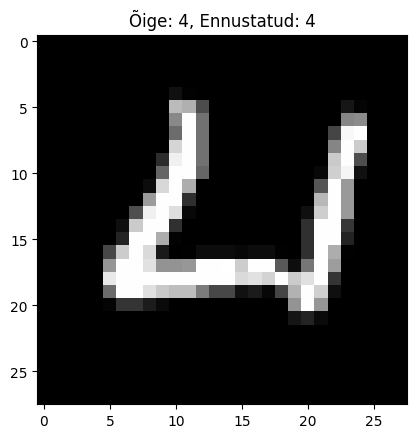

In [52]:
predict_random_test_image(model, test_loader)

Nüüd, söötmaks mudelile ette meie endi pilte, siis kirjutage funktsioon, mis võtaks sisendiks pildi asukoha arvutis ja mudeli ning ennustakse sellele märgendit ning kuvaks selle:

vihjed:
1. kasutage `cv2` teeki
2. ennustamine on juba ette antud funktsioonis `predict_random_test_image`
3. pildi peab muutma mustvalgeks ning suuruse ümber skaleerima
4. prooviks saab kasutada pilte: `"./num6.jpeg",` `"./num2.jpeg"` jne.

In [53]:
# Eeltöötle pilt ja ennusta 
def preprocess_and_predict(model, image_path):
    # todo: lae pilt üles mustvalgena
    # todo: reskaleeri ja pööra pilt negatiivi (treeningandemetes on tint valge)
    # normaliseeri pilt nii: img_normalized = img.astype(np.float32) / 255 
    #järgenv rida on ette antud, et viia pilt torch formaati 
    #img = torch.tensor(img_normalized).view(-1, 28*28)

    # ennusta ja joonista pilt
    return None


In [ ]:
# Eeltöötle pilt ja ennusta 
def preprocess_and_predict(model, image_path):
    # Load the image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Resize and invert the image
    img = cv2.resize(img, (28, 28))
    img = cv2.bitwise_not(img)  # Invert colors to match training data
    # Normalize the image
    img_normalized = img.astype(np.float32) / 255
    img = torch.tensor(img_normalized).view(-1, 28*28)

    # Forward pass through the model
    outputs = model(img)
    _, predicted = torch.max(outputs, 1)
    plt.imshow(img_normalized, cmap='gray')
    plt.title(f'Predicted Digit: {predicted.item()}')
    plt.show()
    return predicted.item()


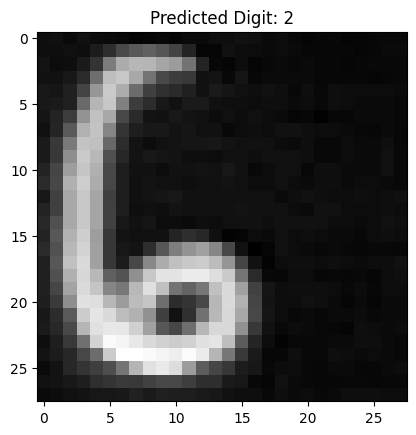

2

In [41]:
preprocess_and_predict(model, "./num6.jpeg")

**BONUS** 

Kui tundub, et mudel ei saa meie enda numbritest aru, siis proovige mudelit paremaks saada lisades või eemaldades `create_model()` funktsiooni kihte, muutes aktivatsioone või regularisatsiooni või varieerides treeningu pikkust ehk epohhe. (Vt. ka PyTorchi dokumentatsiooni https://pytorch.org/docs/stable/nn.html)

**BONUS** *(keeruline)*

Kui aega jääb üle, võib ühildada nt YOLO (objektituvastus mudel) ja numbrituvastaja, leidmaks etteantud pilidilt kõik numbrid ja need tuvastada.